In [62]:
library(qvalue)
library(ggplot2)
library(cowplot)

In [63]:
endo_eqtl_file = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/eqtl_allstages.tsv"
df0 = read.csv(endo_eqtl_file, sep = "\t")
nrow(df0)
length(unique(df0$feature))

[1] 4877

[1] 3240

In [64]:
head(df0,2)

snp_id,feature,stage
5_149826526_C_T,ENSG00000164587_RPS14,ips
11_57283988_C_T,ENSG00000134809_TIMM10,ips


In [65]:
df0$chrom = gsub("_.*","",df0$snp_id)
head(df0,2)

snp_id,feature,stage,chrom
5_149826526_C_T,ENSG00000164587_RPS14,ips,5
11_57283988_C_T,ENSG00000134809_TIMM10,ips,11


In [66]:
# for (chrom in 1:22){
#     print(c(chrom, length(unique(df0[df0$chrom == chrom,]$feature))))
# }

In [67]:
folder = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/new/MOFA/"

In [72]:
summary_filename = paste0(folder, "MOFA5/summary_endo_eqtl.csv")
df = read.csv(summary_filename, row.names = 1)
for (chrom in 1:22){
    print(c(chrom, length(unique(df[df$chrom == chrom,]$gene)),length(unique(df0[df0$chrom == chrom,]$feature))))
}

[1]   1 225 315
[1]   2 214 230
[1]   3 190 190
[1]   4 116 116
[1]   5 165 165
[1]   6 186 186
[1]   7 175 175
[1]   8 124 124
[1]   9 130 130
[1]  10 121 121
[1]  11 178 178
[1]  12 172 172
[1] 13 59 59
[1]  14 110 110
[1]  15 106 106
[1]  16 154 154
[1]  17 200 200
[1] 18 51 51
[1]  19 230 246
[1] 20 79 79
[1] 21 45 45
[1] 22 88 88


In [38]:
3,4,5,6,7,8,9,10,12,13,14,15,16,18,20,21,22

ERROR: Error in parse(text = x, srcfile = src): <text>:1:2: unexpected ','
1: 3,
     ^


In [123]:
T = 0.05
# T = 0.1

In [124]:
##### MOFA 1

In [140]:
summary_filename = paste0(folder, "MOFA1/summary_endo_eqtl.csv")
df = read.csv(summary_filename, row.names = 1)
# df = df[df$chrom == 22,]
nrow(df)
head(df,2)

[1] 4390

,gene,n_snps,chrom,pv_raw,snpID,pv
0,ENSG00000140905_GCSH,1,16,0.21847265,16_81118466_A_G,0.21847265
1,ENSG00000011523_CEP68,2,2,0.00126596,2_65279223_C_T,0.00253192


In [141]:
df$qv = qvalue(df$pv_raw, pi0 = 1)$qvalue
# mofa1 = nrow(df[df$qv<0.05,])
# n_genes1 = nrow(df)
mofa1 = length(unique(df[df$qv<T,"gene"]))
n_genes1 = length(unique(df$gene))
c(mofa1,n_genes1, mofa1/n_genes1)

[1] 1.640000e+02 3.161000e+03 5.188232e-02

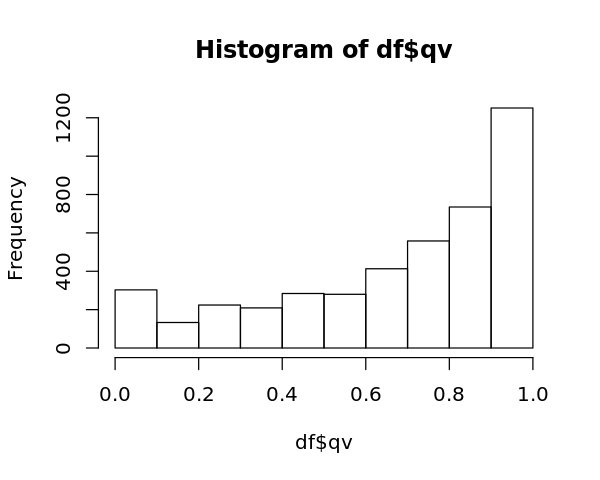

In [144]:
# df$pv_bh = p.adjust(df$pv, method = "BH")
hist(df$qv)

In [127]:
##### MOFA 2

In [128]:
summary_filename = paste0(folder, "MOFA2/summary_endo_eqtl.csv")
df = read.csv(summary_filename, row.names = 1)
# df = df[df$chrom == 22,]
nrow(df)
tail(df,2)

[1] 4374

,gene,n_snps,chrom,pv_raw,snpID,pv
4372,ENSG00000130312_MRPL34,3,19,0.3302749,19_17415781_G_T,0.9908248
4373,ENSG00000130312_MRPL34,3,19,0.2910506,19_17419848_T_C,0.8731518


In [129]:
df$qv = qvalue(df$pv_raw)$qvalue
# mofa2 = nrow(df[df$qv<0.05,])
# n_genes2 = nrow(df)
mofa2 = length(unique(df[df$qv<T,"gene"]))
n_genes2 = length(unique(df$gene))
c(mofa2,n_genes2, mofa2/n_genes2)

[1] 2.130000e+02 3.144000e+03 6.774809e-02

In [130]:
##### MOFA 5

In [131]:
summary_filename = paste0(folder, "MOFA5/summary_endo_eqtl.csv")
df = read.csv(summary_filename, row.names = 1)
# df = df[df$chrom == 22,]
nrow(df)
tail(df,2)

[1] 4347

,gene,n_snps,chrom,pv_raw,snpID,pv
4345,ENSG00000130312_MRPL34,3,19,0.5049681,19_17415781_G_T,1
4346,ENSG00000130312_MRPL34,3,19,0.4502882,19_17419848_T_C,1


In [132]:
df$qv = qvalue(df$pv_raw)$qvalue
# mofa5 = nrow(df[df$qv<0.05,])
# n_genes5 = nrow(df)
mofa5 = length(unique(df[df$qv<T,"gene"]))
n_genes5 = length(unique(df$gene))
c(mofa5,n_genes5, mofa5/n_genes5)

[1] 2.7700e+02 3.1180e+03 8.8839e-02

In [133]:
##### MOFA 10

In [134]:
summary_filename = paste0(folder, "MOFA10/summary_endo_eqtl.csv")
df = read.csv(summary_filename, row.names = 1)
# df = df[df$chrom == 22,]
nrow(df)
tail(df,2)

[1] 4470

,gene,n_snps,chrom,pv_raw,snpID,pv
4468,ENSG00000130312_MRPL34,3,19,0.7018502,19_17415781_G_T,1
4469,ENSG00000130312_MRPL34,3,19,0.6436855,19_17419848_T_C,1


In [135]:
df$qv = qvalue(df$pv_raw,pi0 = 1)$qvalue
# mofa10 = nrow(df[df$qv<0.05,])
# n_genes10 = nrow(df)
mofa10 = length(unique(df[df$qv<T,"gene"]))
n_genes10 = length(unique(df$gene))
c(mofa10,n_genes10, mofa10/n_genes10)

[1]  431.0000000 3240.0000000    0.1330247

In [136]:
df_10_MOFA = df[df$qv<0.1,]
colnames(df_10_MOFA) = c("feature_id","n_snps","chrom","p_value","snp_id","empirical_feature_p_value","q_value")

In [137]:
write.csv(df_10_MOFA, "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/new/mofa10_results.csv")

In [138]:
df_to_plot = data.frame(n_MOFA = c(1,2,5,10), 
                        n_eGenes = c(mofa1, mofa2, mofa5, mofa10), 
                        n_genes = c(n_genes1, n_genes2, n_genes5, n_genes10))

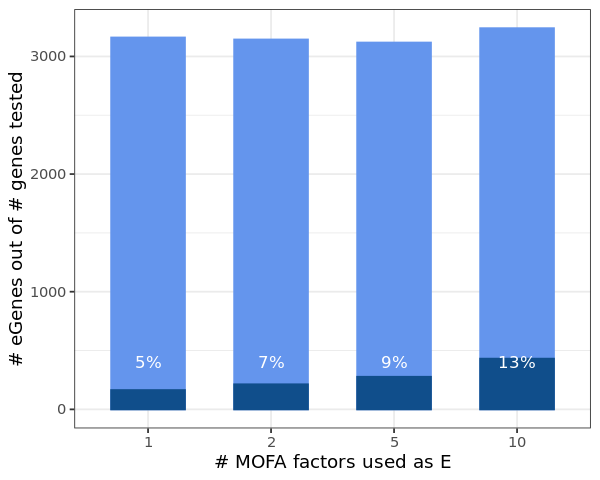

In [139]:
options(repr.plot.width = 5, repr.plot.height = 4)
ggplot(df_to_plot, aes(x = as.factor(n_MOFA), y = n_genes)) + #ggtitle("chromosome 22") + 
    geom_bar(stat="identity", width = 0.6, fill = "cornflowerblue", col = "cornflowerblue") + 
    geom_bar(aes(x = as.factor(n_MOFA), y = n_eGenes), stat="identity", width = 0.6, 
             fill = "dodgerblue4", col = "dodgerblue4") + 
    xlab("# MOFA factors used as E") + ylab("# eGenes out of # genes tested") + theme_bw() +
    annotate("text", x=1, y=400, label= paste0(round(mofa1/n_genes1,digits=2)*100,"%"), size = 3.5, col = "white") +
    annotate("text", x=2, y=400, label= paste0(round(mofa2/n_genes2,digits=2)*100,"%"), size = 3.5, col = "white") +
    annotate("text", x=3, y=400, label= paste0(round(mofa5/n_genes5,digits=2)*100,"%"), size = 3.5, col = "white") +
    annotate("text", x=4, y=400, label= paste0(round(mofa10/n_genes10,digits=2)*100,"%"), size = 3.5, col = "white")

In [101]:
prefixes = c("MOFA1","MOFA2","MOFA5","MOFA10")

In [102]:
i = 1
plist = list()
for (prefix in prefixes){
    file0 = paste0(folder,prefix,"/summary_endo_eqtl.csv")
    df0 = read.csv(file0, row.names=1)
#     df0 = df0[df0$gene %in% chrom_22$feature,]
#     file1 = paste0(mydir,prefix,"/summary_endo_eqtl_perms.csv")
#     df1 = read.csv(file1, row.names=1)
#     df1$gene = gsub("_perm0","",df1$gene)
#     df1 = df1[df1$gene %in% chrom_22$feature,]
#     df = inner_join(df0, df1,by = c("gene","snpID","n_snps"), suffix = c("",".perm"))
    df = df0
    df$pv_uniform = runif(n = nrow(df), min = 0, max = 1)
    p = ggplot(df, aes(x = sort(-log10(pv_uniform)), y = sort(-log10(pv)))) + geom_point(alpha = 0.8, col = "cornflowerblue")
#     p = p + geom_point(aes(x = sort(-log10(pv_uniform)), y = sort(-log10(pv.perm))), col = "black", alpha = 0.8)
    p = p + geom_abline(slope = 1) + theme_bw()
    plist[[i]] = p + ggtitle(prefix) 
    i = i+1
} 

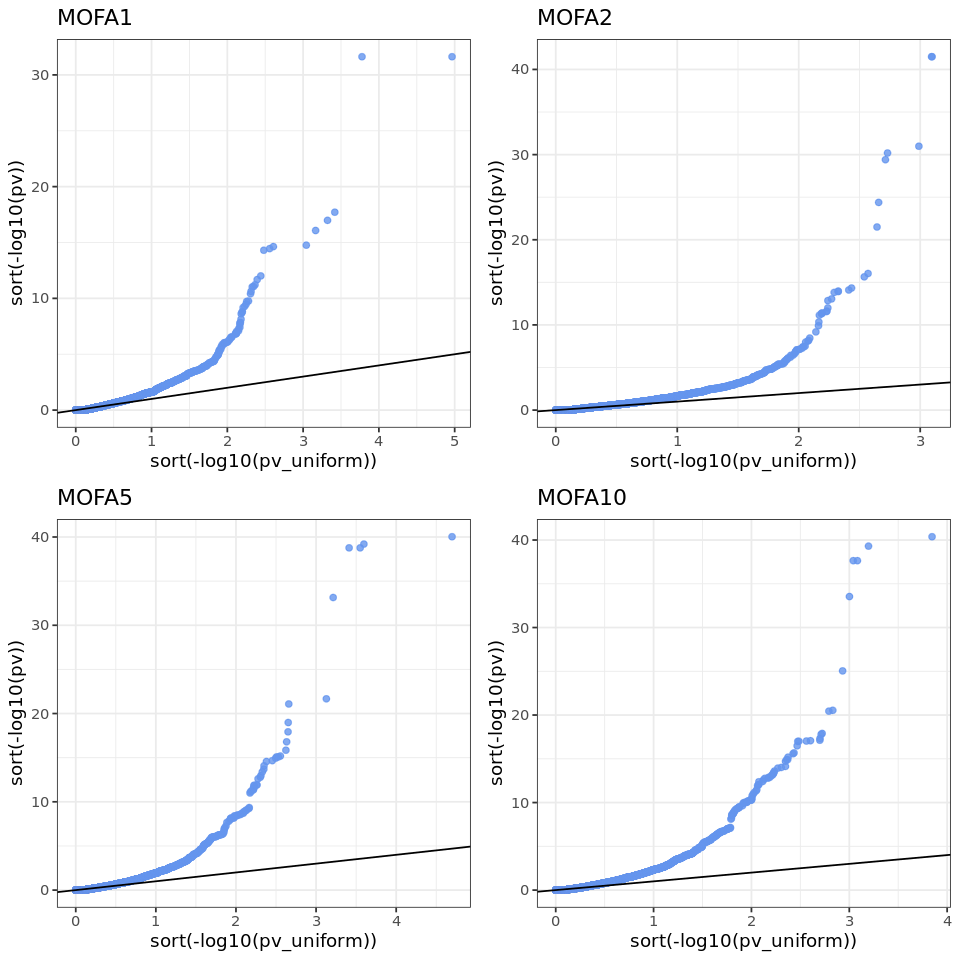

In [103]:
options(repr.plot.width = 8, repr.plot.height = 8)
plot_grid(plist[[1]],plist[[2]],plist[[3]],plist[[4]],ncol = 2)

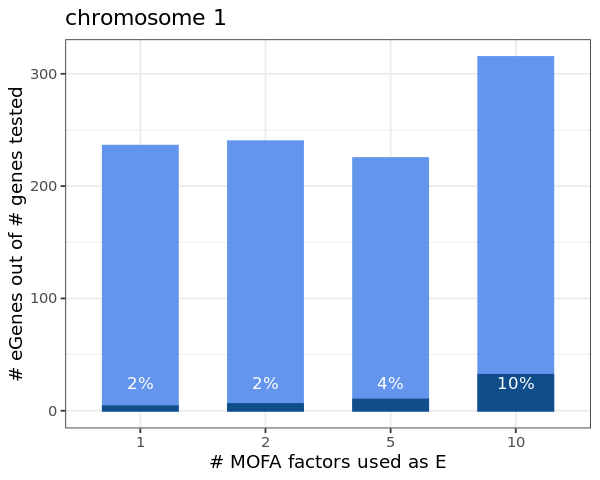

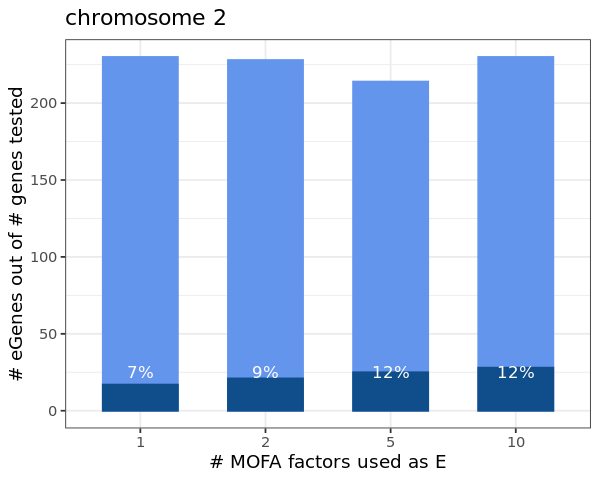

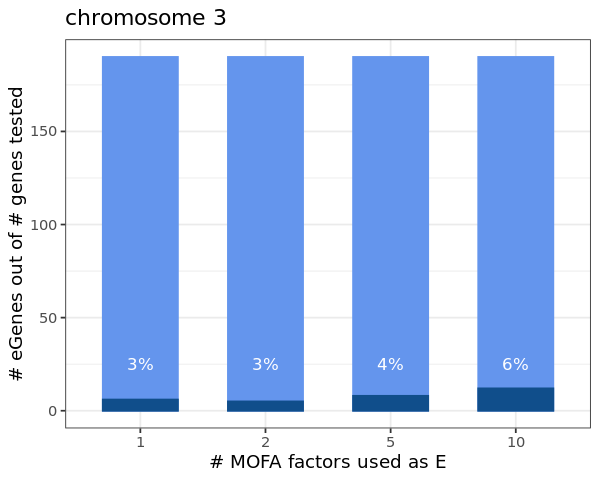

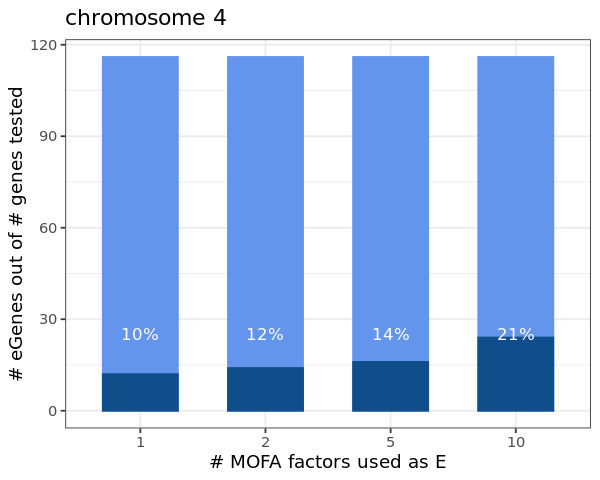

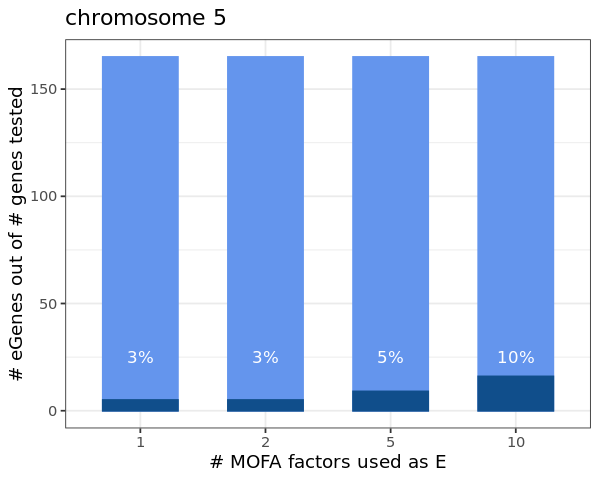

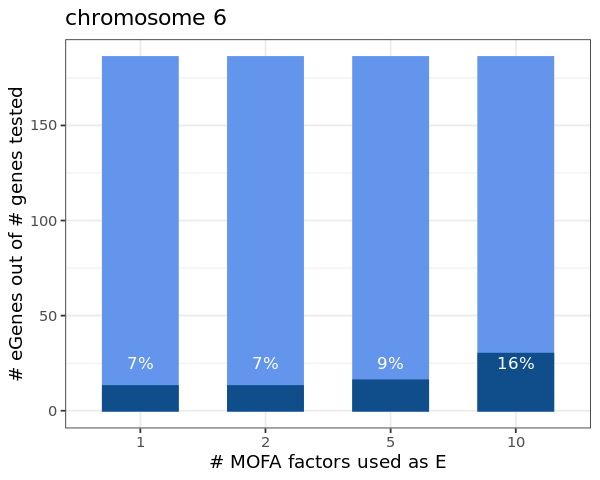

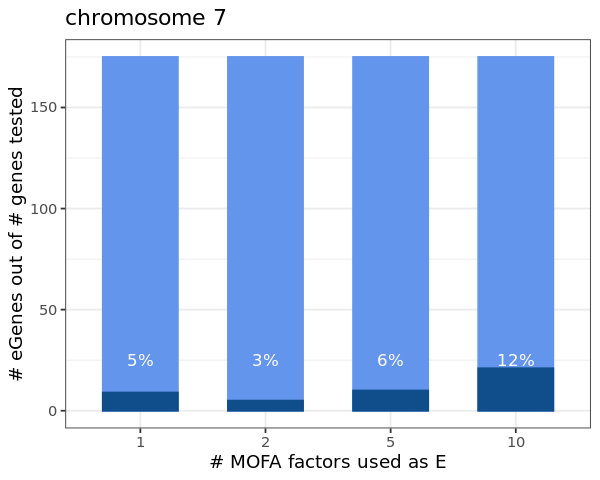

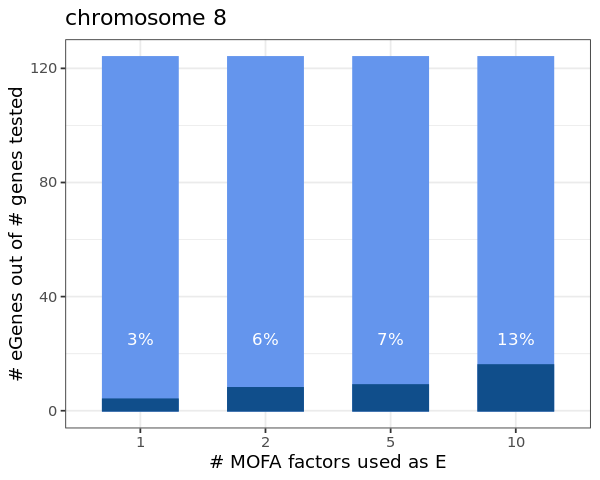

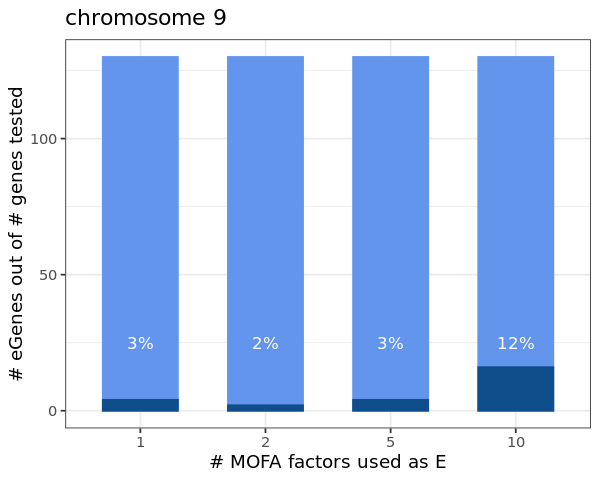

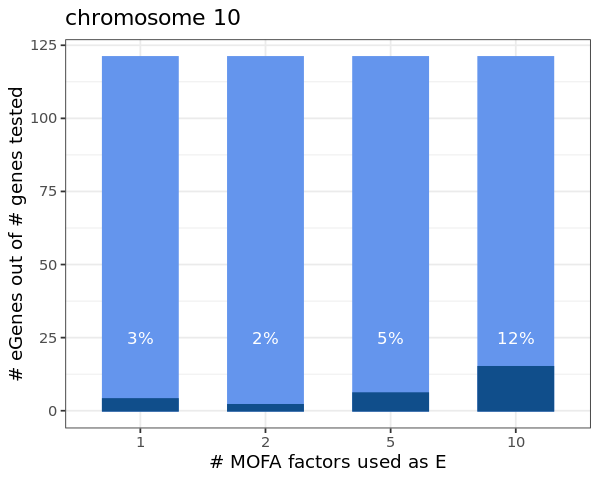

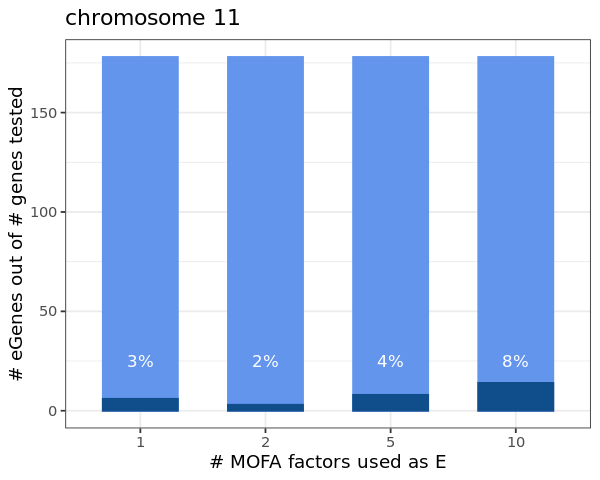

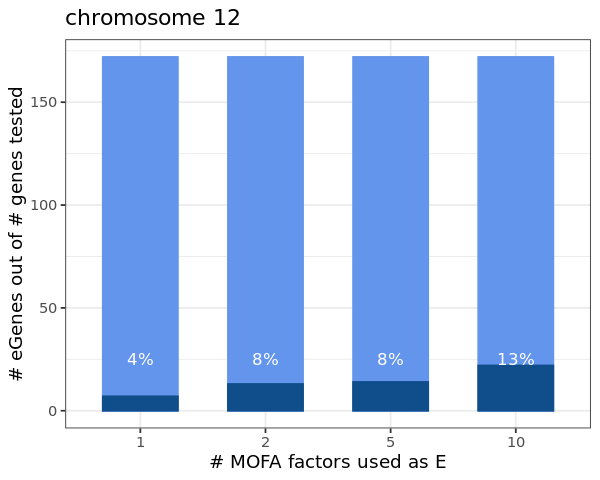

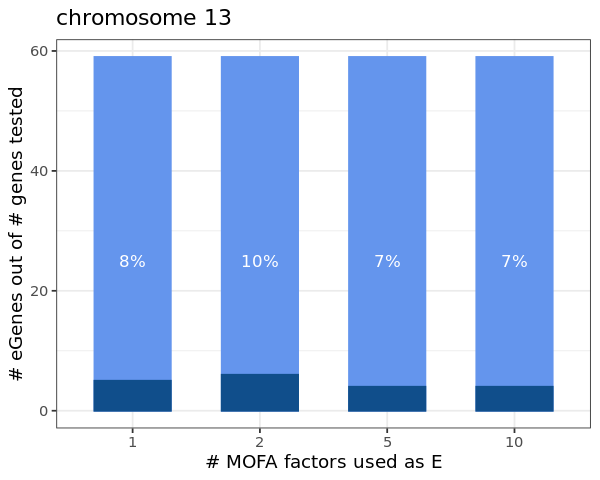

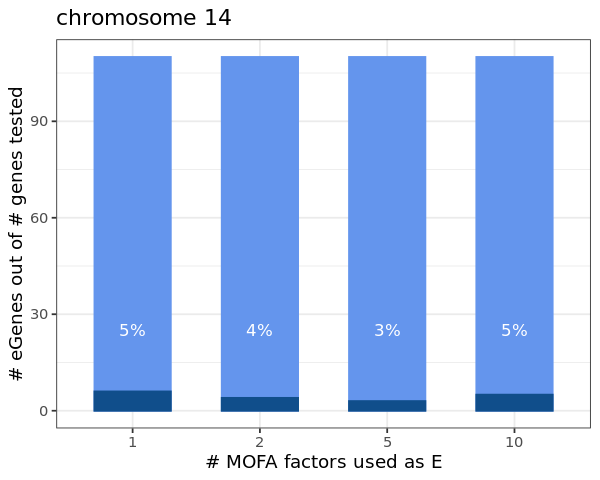

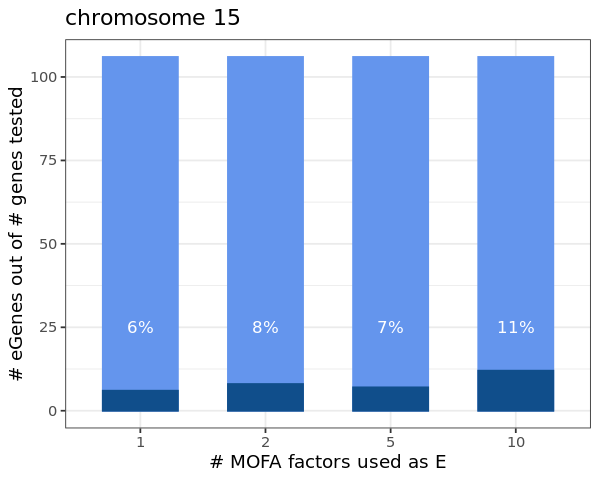

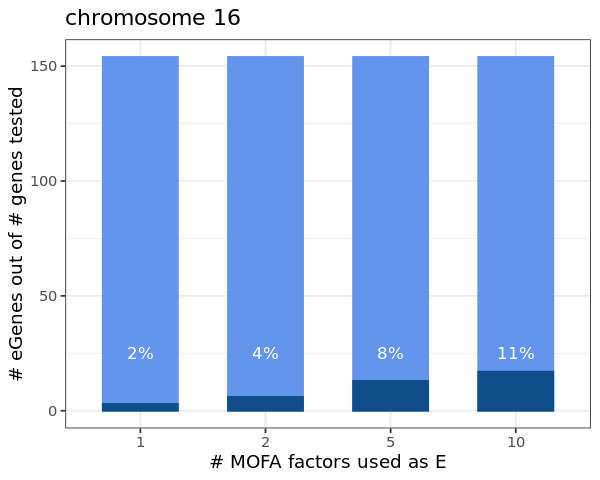

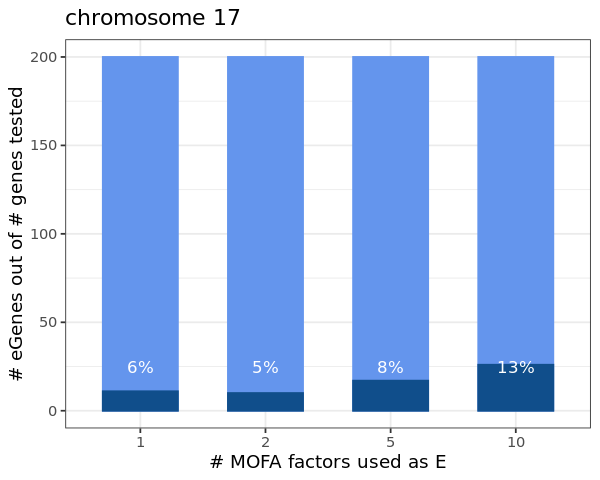

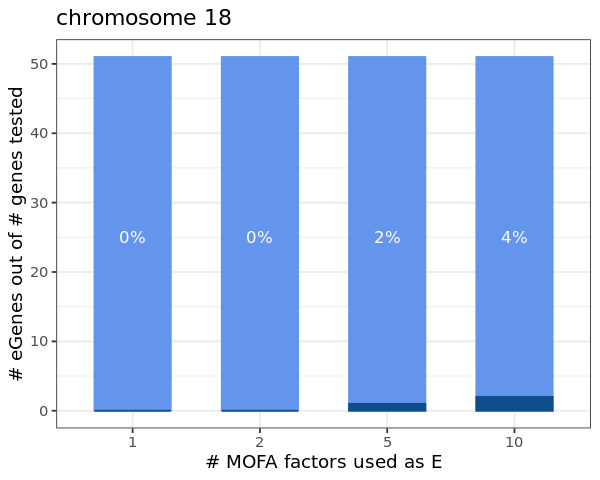

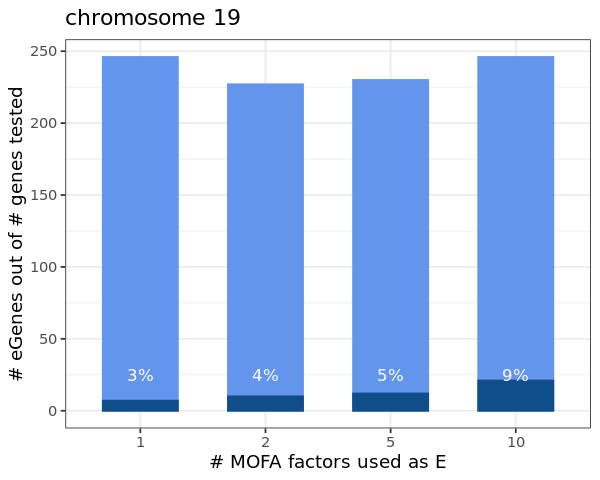

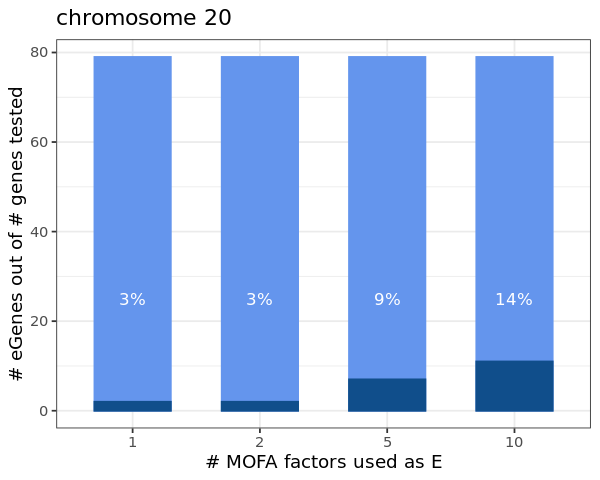

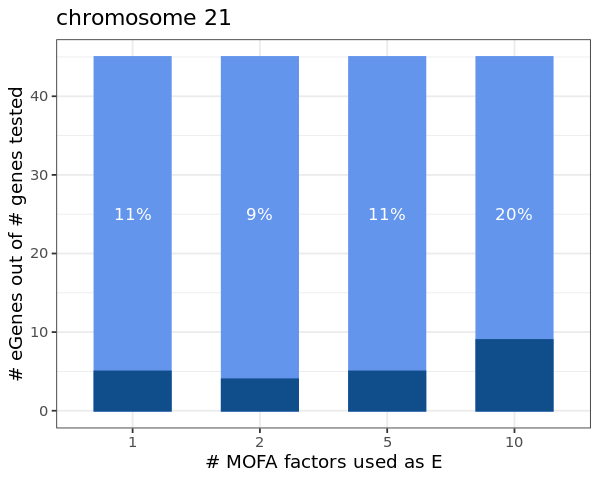

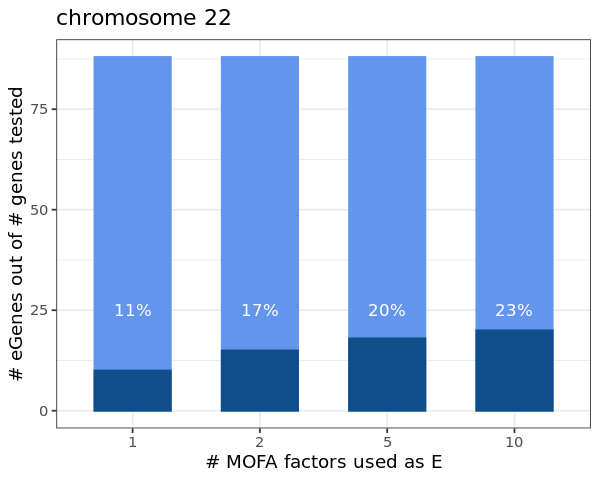

In [104]:
T = 0.05
# T = 0.1
options(repr.plot.width = 5, repr.plot.height = 4)
for (chrom in 1:22){
    # MOFA1
    summary_filename = paste0(folder, "MOFA1/summary_endo_eqtl.csv")
    df = read.csv(summary_filename, row.names = 1)
    df = df[df$chrom == chrom,]
    df$qv = qvalue(df$pv,pi0 = 1)$qvalue
    mofa1 = length(unique(df[df$qv<T,"gene"]))
    n_genes1 = length(unique(df$gene))
    # MOFA2
    summary_filename = paste0(folder, "MOFA2/summary_endo_eqtl.csv")
    df = read.csv(summary_filename, row.names = 1)
    df = df[df$chrom == chrom,]
    df$qv = qvalue(df$pv,pi0 = 1)$qvalue
    mofa2 = length(unique(df[df$qv<T,"gene"]))
    n_genes2 = length(unique(df$gene))
    # MOFA5
    summary_filename = paste0(folder, "MOFA5/summary_endo_eqtl.csv")
    df = read.csv(summary_filename, row.names = 1)
    df = df[df$chrom == chrom,]
    df$qv = qvalue(df$pv,pi0 = 1)$qvalue
    mofa5 = length(unique(df[df$qv<T,"gene"]))
    n_genes5 = length(unique(df$gene))
    # MOFA10
    summary_filename = paste0(folder, "MOFA10/summary_endo_eqtl.csv")
    df = read.csv(summary_filename, row.names = 1)
    df = df[df$chrom == chrom,]
    df$qv = qvalue(df$pv,pi0 = 1)$qvalue
    mofa10 = length(unique(df[df$qv<T,"gene"]))
    n_genes10 = length(unique(df$gene))
    # build df and plot
    df_to_plot = data.frame(n_MOFA = c(1,2,5,10), 
                        n_eGenes = c(mofa1, mofa2, mofa5, mofa10), 
                        n_genes = c(n_genes1, n_genes2, n_genes5, n_genes10))
    p = ggplot(df_to_plot, aes(x = as.factor(n_MOFA), y = n_genes)) + 
        ggtitle(paste0("chromosome ",chrom)) + 
        geom_bar(stat="identity", width = 0.6, fill = "cornflowerblue", col = "cornflowerblue") + 
        geom_bar(aes(x = as.factor(n_MOFA), y = n_eGenes), stat="identity", width = 0.6, 
                 fill = "dodgerblue4", col = "dodgerblue4") + 
        xlab("# MOFA factors used as E") + ylab("# eGenes out of # genes tested") + theme_bw() +
        annotate("text", x=1, y=25, label= paste0(round(mofa1/n_genes1,digits=2)*100,"%"), size = 3.5, col = "white") +
        annotate("text", x=2, y=25, label= paste0(round(mofa2/n_genes2,digits=2)*100,"%"), size = 3.5, col = "white") +
        annotate("text", x=3, y=25, label= paste0(round(mofa5/n_genes5,digits=2)*100,"%"), size = 3.5, col = "white") +
        annotate("text", x=4, y=25, label= paste0(round(mofa10/n_genes10,digits=2)*100,"%"), size = 3.5, col = "white")
    print(p)
    
}

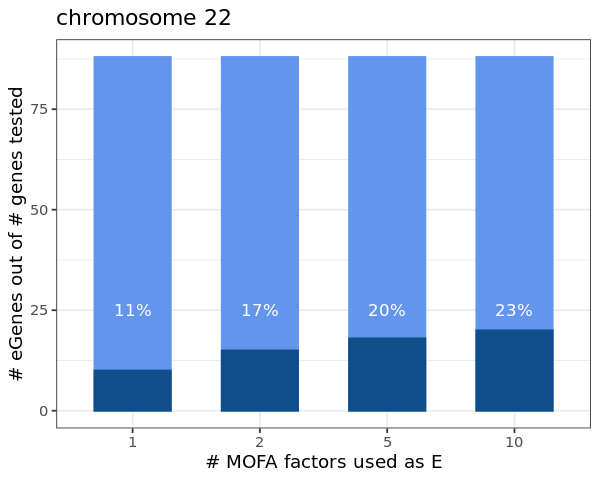

In [105]:
options(repr.plot.width = 5, repr.plot.height = 4)
ggplot(df_to_plot, aes(x = as.factor(n_MOFA), y = n_genes)) + ggtitle("chromosome 22") + 
    geom_bar(stat="identity", width = 0.6, fill = "cornflowerblue", col = "cornflowerblue") + 
    geom_bar(aes(x = as.factor(n_MOFA), y = n_eGenes), stat="identity", width = 0.6, 
             fill = "dodgerblue4", col = "dodgerblue4") + 
    xlab("# MOFA factors used as E") + ylab("# eGenes out of # genes tested") + theme_bw() +
    annotate("text", x=1, y=25, label= paste0(round(mofa1/n_genes1,digits=2)*100,"%"), size = 3.5, col = "white") +
    annotate("text", x=2, y=25, label= paste0(round(mofa2/n_genes2,digits=2)*100,"%"), size = 3.5, col = "white") +
    annotate("text", x=3, y=25, label= paste0(round(mofa5/n_genes5,digits=2)*100,"%"), size = 3.5, col = "white") +
    annotate("text", x=4, y=25, label= paste0(round(mofa10/n_genes10,digits=2)*100,"%"), size = 3.5, col = "white")